## 0. Project Outline

This project aims to predict customer churn using decision trees and random forests, two widely used machine learning algorithms for classification tasks. The primary objective is to analyze customer behavior and identify patterns that lead to churn. Predicting customer churn helps businesses retain customers by identifying at-risk individuals and proactively addressing their concerns.

The key steps include:

1. Understanding the dataset – Reviewing the data source and its variables.
2. Data Cleaning – Handling missing values and ensuring data quality.
3. Feature Engineering & Preprocessing – Selecting relevant features and preparing data for modeling.
4. Decision Tree Modeling – Building and optimizing a decision tree classifier.
5. Random Forest Modeling – Implementing a random forest model for improved performance and robustness.
6. Evaluation & Interpretation – Assessing model performance and drawing business insights.

## 1. Data Background

The dataset is a publicly available customer churn dataset provided by IBM Sample Data, representing a hypothetical telecommunications company. It contains information on customer demographics, services, and account details.

### Target Variable:

- Churn: A binary variable (1 = Yes, 0 = No), indicating whether a customer has discontinued service in the last month.

### Key Features:

#### Demographics:
- SeniorCitizen: Binary indicator (1 = Senior citizen, 0 = Non-senior).
- Partner: Whether the customer has a spouse or not.
- Dependents: Whether the customer has dependents.
#### Service Information:
- MultipleLines: Indicates multiple phone lines (Yes/No/No phone service).
- DeviceProtection: Whether the customer has device protection.
- TechSupport: Availability of tech support services.
#### Contract & Billing:
- Contract: Type of contract (Month-to-month, One-year, Two-year).
- PaperlessBilling: Whether the customer uses paperless billing.
- PaymentMethod: (Electronic check, Mailed check, Bank transfer, Credit card).
#### Usage & Charges:
- Tenure: Duration of the customer’s subscription (in months).
- MonthlyCharges: The monthly fee charged to the customer.
- TotalCharges: The total revenue generated from the customer.

## 2. Data Cleaning and Preprocessing

Before modeling, we need to ensure the dataset is clean and structured appropriately. The key preprocessing steps include:

1. Handling Missing Values – Identifying and dealing with missing or inconsistent entries.
2. Data Type Conversions – Ensuring numerical and categorical features are correctly formatted.
3. Feature Encoding – Converting categorical variables into machine-readable format.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

### 2.1 Read and Clean the Data

In [2]:
# import telco churn data
df = pd.read_csv('telco_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Now I will perform some exploratory data analysis:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


As you can see above, TotalCharges is of type object when it should be of type float. We will fix that now.

In [4]:
# Make sure that TotalCharges is a numeric column
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# check for missing values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There seem to be 11 missing values for TotalCharges. I will explore those values now.

In [5]:
df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


It seems that the people with the missing TotalCharges value also have a value of 0 for tenure. Due to these missing pieces of data, I will remove these 11 observations from the dataset.

In [6]:
df = df[~np.isnan(df['TotalCharges'])]
# encode churn as 1 for yes and 0 for no
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

## 3. Feature Selection

Binary categorical variables (Yes/No) will be encoded as 1 and 0. Multiclass categorical variables will be OneHotEncoded. After encoding all the categorical variables as either 0 or 1, I will examine the correlation of the features to ensure that we do not have multiple features that encode the same information.

In [7]:
X = df.drop('Churn', axis=1)
X = X.drop('customerID', axis=1)
y = df['Churn']

# encode partner, dependents, PhoneService, and PaperlessBilling as 1 for yes and 0 for no
X['Partner'] = X['Partner'].map({'Yes': 1, 'No': 0})
X['Dependents'] = X['Dependents'].map({'Yes': 1, 'No': 0})
X['PhoneService'] = X['PhoneService'].map({'Yes': 1, 'No': 0})
X['PaperlessBilling'] = X['PaperlessBilling'].map({'Yes': 1, 'No': 0})

# encode categorical features
cat_features = ['gender', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


X = pd.get_dummies(X, columns=cat_features, prefix=cat_features)

corr_mat = pd.DataFrame(X.corr())

corr_thresh = 0.90

# Pull out the correlations higher than 0.90
high_corr_var=np.where(corr_mat>corr_thresh)
high_corr_var=[(corr_mat.columns[x],corr_mat.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]


- Customers without internet service have "No internet service" responses for multiple features (e.g., `OnlineBackup`, `StreamingTV`).
- These features are redundant since "Internet Service" already captures this information.
- We remove these features to prevent unnecessary complexity in our model.

In [8]:
# Drop the columns with high correlation
X = X.drop(['OnlineSecurity_No internet service', 'OnlineBackup_No internet service',
       'DeviceProtection_No internet service', 'TechSupport_No internet service',
       'StreamingTV_No internet service', 'StreamingMovies_No internet service', 'gender_Male', 'MultipleLines_No phone service'], axis=1)

X.shape

(7032, 33)

We can see that we only have 33 features now that we have removed 8 of the redundant features. Now I will split the data into training and testing data in order to move onto creating and testing our models.

### 3.2 Splitting Data into Train and Test Data

We must split our data into training and testing data in order to evaluate if our model makes good predictions on observations for which it has not been trained. The test data must not be used until the completion of the model training. However, we want to give our training data smaller "quizzes" before the final test in order to see which hyperparameters result in the best predictions on data not before seen-- this is the role of cross validation where we tune the hyperparameters of our decision tree.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=333)

## 4. Decision Tree Model

### 4.0 Decision Tree Intuition

Decision trees are a supervised learning algorithm used for both classification and regression tasks. They work by recursively partitioning the dataset into subsets based on the most informative features, ultimately forming a tree-like structure for decision-making. At each node, the algorithm selects the feature that best separates the data according to a chosen criterion.

For classification tasks, decision trees typically use Gini impurity to evaluate the quality of a split. The Gini impurity is calculated for each feature at every possible split, and the feature with the lowest Gini impurity is chosen to split the node. This process continues until a stopping criterion is met, such as a maximum tree depth or a minimum number of samples per leaf.

### 4.1 Hyperparameter tuning

Hyperparameters control the complexity and generalization ability of a decision tree. Because decision trees are prone to overfitting—where they memorize training data rather than learning general patterns—it is essential to tune these hyperparameters to balance model complexity. Key hyperparameters include:

- Max Depth (max_depth): Limits the depth of the tree to prevent overfitting.
- Min Samples Split (min_samples_split): The minimum number of samples required to split a node.
- Min Samples Leaf (min_samples_leaf): The minimum number of samples required to form a leaf node.

By carefully tuning these hyperparameters, we aim to find the optimal balance between underfitting (too simple a model) and overfitting (too complex a model).

### 4.2 Cross-validation

Cross-validation is a technique used to assess a model’s performance by splitting the dataset into multiple subsets, or folds, to ensure the model generalizes well to unseen data. In k-fold cross-validation, the data is divided into k equally sized folds. The model is trained on k-1 folds and tested on the remaining fold. This process is repeated k times, with each fold serving as the test set once.

To further improve robustness, we use repeated k-fold cross-validation, where the entire k-fold process is repeated multiple times with different random splits of the data. In our hyperparameter tuning, we employ 10-fold cross-validation repeated 10 times to obtain a reliable estimate of model performance. This helps mitigate the effects of random variations in data splitting and provides a more stable estimate of accuracy and variance.

In [10]:

param_grid = {
    'min_samples_leaf': [25, 50, 75, 100, 200, 300],
    'min_impurity_decrease': [0.0, 0.001, 0.01, 0.02]
}

tree = DecisionTreeClassifier(random_state=333)
# do 10 fold cross validation repeated 10 times (100 total folds)
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=222)

# since there are 36 combinations of parameters, this will mean 3,600 models will be trained
grid_cv = GridSearchCV(estimator=tree, param_grid=param_grid, cv=cv,
                        scoring='accuracy', n_jobs=-1, refit=True)

grid_cv.fit(X_train, y_train)

cv_results = pd.DataFrame(grid_cv.cv_results_).filter(like = 'split')

best_results = cv_results.loc[grid_cv.best_index_, :]

# Print the model's bias as measured by mean accuracy
print(f'Mean Accuracy: {best_results.mean()}')

# Print the model's variance as measured by the standard deviation of the accuracy
print(f'Standard Deviation: {best_results.std()}')

# Print the best parameters
print(grid_cv.best_params_)

Mean Accuracy: 0.7896188757482476
Standard Deviation: 0.01573100506152862
{'min_impurity_decrease': 0.0, 'min_samples_leaf': 75}


As shown above, the optimal hyperparameters are min_samples_leaf = 75 and min_impurity_decrease = 0.0, resulting in an estimated accuracy of 0.7896 with a standard deviation of 0.0157. While other hyperparameters, such as max_depth and min_samples_split, were considered, they did not improve the model’s predictive performance.

Next, I will evaluate the model on the test dataset. Based on cross-validation results, we expect the model to achieve an accuracy of approximately 0.79, with a standard deviation of 0.0157.

### 4.3 Testing the Model and Interpretation

Model accuracy: 0.8117


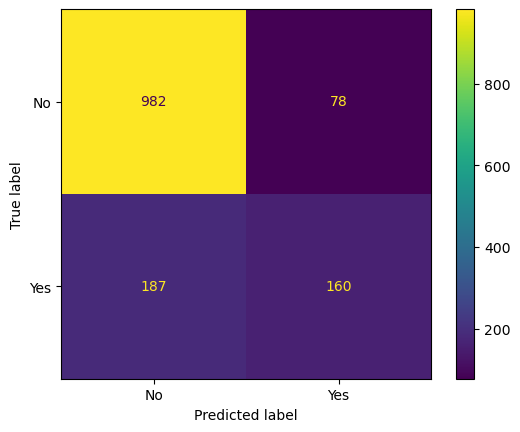

In [11]:
best_dt = grid_cv.best_estimator_

# make predictions
y_pred_dt = best_dt.predict(X_test)

# calculate accuracy
print(f'Model accuracy: {best_dt.score(X_test, y_test):.4f}')

# create confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No', 'Yes'])
cmd.plot()

The model's accuracy is reasonable, as it falls within two standard deviations of our previous estimate. However, the confusion matrix reveals some potential concerns.

Among the 347 customers who actually churned in the test dataset, the model correctly identified only 160 as likely to churn, meaning it failed to detect 187 churned customers. On the positive side, of the 238 customers predicted to churn, 160 did indeed churn, resulting in a precision of approximately 67% (160/238).

If this model were used to target at-risk customers with retention offers, about 66% of the targeted individuals would indeed have churned, while 34% would not have churned. This could be acceptable if the goal is to minimize unnecessary outreach to customers unlikely to leave. However, if our priority is to correctly identify a larger proportion of actual churners (i.e., improving recall), this model may not be sufficient, and exploring alternative modeling approaches or adjusting the decision threshold could be beneficial.

### 4.4 Model Visualization

Now we will visualize the decision tree to get an idea of its complexity.

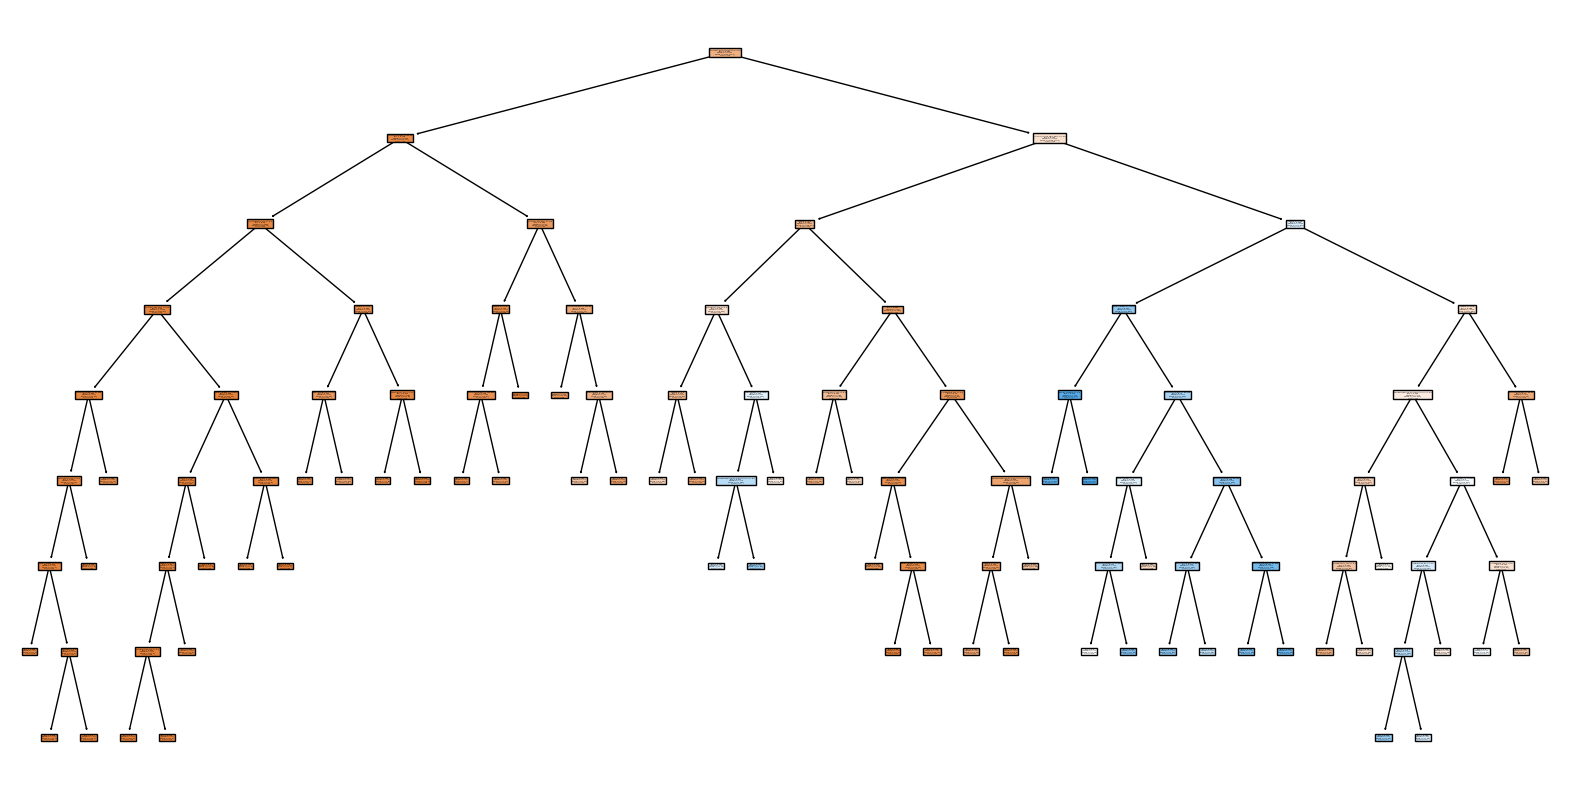

In [12]:
plt.figure(figsize=(20, 10))
dt_plot = plot_tree(best_dt, filled=True, feature_names=list(X_train.columns), class_names=['No', 'Yes'])

### 4.5 Interpreting Key Features in the Model

I will now identify the important features from our decision tree model above in order to identify the key drivers behind customer churn.

In [13]:
feature_importance = best_dt.feature_importances_
# print the feature importance with the most important features first as a dataframe
pd.DataFrame({'feature': X_train.columns, 'importance': feature_importance}).sort_values('importance', ascending=False).head(10)

,feature,importance
26,Contract_Month-to-month,0.495012
3,tenure,0.172348
12,InternetService_Fiber optic,0.148085
6,MonthlyCharges,0.046953
7,TotalCharges,0.043734
20,TechSupport_No,0.023099
31,PaymentMethod_Electronic check,0.014921
4,PhoneService,0.011035
27,Contract_One year,0.010244
23,StreamingTV_Yes,0.006671


As shown above, the three most influential variables for predicting churn in the decision tree model are contract type (monthly contract), customer tenure, and fiber optic internet service. These features play a significant role in determining whether a customer is likely to churn.

In the following analysis, we will explore these variables in more detail to understand their specific relationship with customer churn.

/Users/alexrike/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alexrike/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alexrike/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


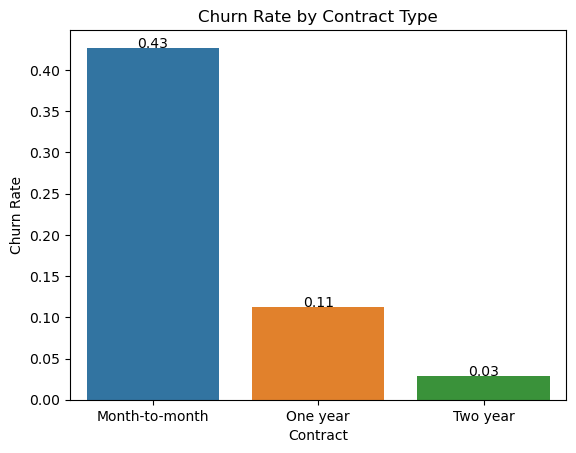

In [14]:
# plot the Contract variable from df as a bar plot with the churn rate
contract_churn = df.groupby('Contract')['Churn'].mean().reset_index()
sns.barplot(x='Contract', y='Churn', data=contract_churn)
plt.title('Churn Rate by Contract Type')
# add text for the churn rate on each bar
for i in range(contract_churn.shape[0]):
    plt.text(x=i, y=contract_churn['Churn'][i], s=f'{contract_churn["Churn"][i]:.2f}', ha='center')
plt.ylabel('Churn Rate')
plt.show()

As shown in the bar plot above, 43% of customers with a monthly contract churn, which is a significantly high churn rate. This explains why contract type is the most important feature in the decision tree model. Customers on month-to-month contracts exhibit a much higher churn rate compared to those on longer-term contracts, making it a key predictor of customer retention.

/Users/alexrike/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alexrike/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alexrike/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alexrike/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

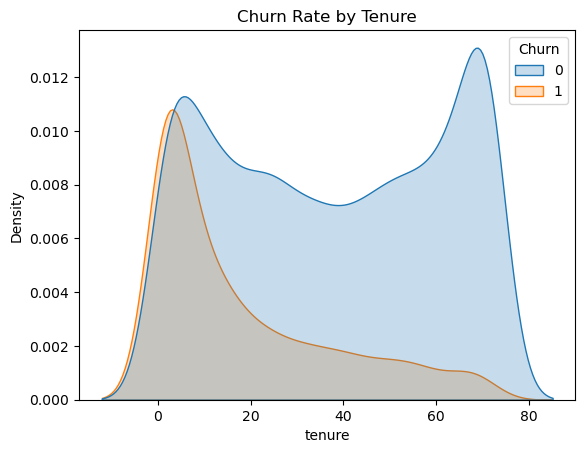

In [15]:
# kdensity plot of the churn by tenure
sns.kdeplot(data=df, x='tenure', hue='Churn', fill=True)
plt.title('Churn Rate by Tenure')
plt.show()

By examining the orange colored KDE plot representing customers who churned, we can see that most churn events occur early in the customer’s tenure. Given this pattern, the model likely predicts that customers with longer tenure are less likely to churn on average.

/Users/alexrike/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alexrike/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alexrike/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alexrike/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

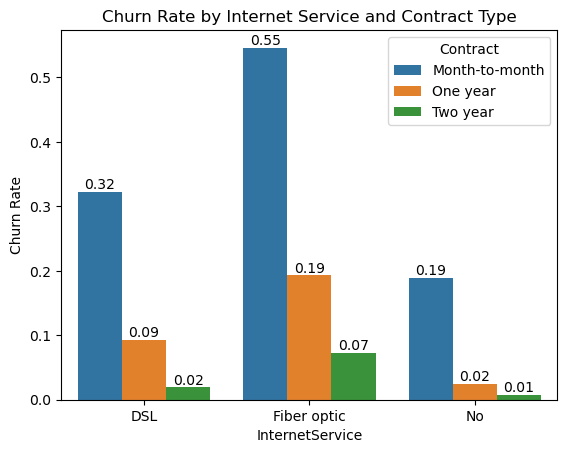

In [16]:
# Plot the churn rate by InternetService for each Contract type
internet_service_churn = df.groupby(['InternetService', 'Contract'])['Churn'].mean().reset_index()
sns.barplot(x='InternetService', y='Churn', hue='Contract', data=internet_service_churn)
plt.title('Churn Rate by Internet Service and Contract Type')
plt.ylabel('Churn Rate')
# add text for the churn rate of each of the 9 bars in the plot
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height():.2f}', ha='center', va='bottom')
plt.show()

As observed in the analysis above, customers with fiber optic internet service exhibit a significantly higher likelihood of churning compared to those without fiber optic service, across all contract types. Notably, customers with fiber optic service on a monthly contract have an average churn rate of approximately 55%. In contrast, the churn rate is considerably lower for customers on a month-to-month contract who either use DSL or have no internet service at all.

### 4.6 Decision Tree Takeaways

The exercise above provided an opportunity to gain an intuitive understanding of decision trees, as this is my first project using them. It helped me gain experience in key areas such as preprocessing, hyperparameter tuning, and extracting insights from important features within the decision tree model. However, decision trees are not ideal for modeling categorical labels due to their tendency to exhibit high variance. Models like Random Forests and Gradient Boosting Machines are typically more accurate when classifying categorical variables. To complete this project, I will now implement a Random Forest model to predict customer churn.

## 5. Random Forest Model

### 5.1 Intuition Behind Random Forests:

Random Forests build multiple decision trees to improve predictive accuracy. They leverage bagging and feature randomization to create a diverse ensemble of trees. Bagging ensures that each tree is trained on different subsets of the data, with some data points being duplicated within each tree. Feature randomization selects a random subset of features at each node, which results in variability among the trees. The core idea behind Random Forests is that by aggregating the "opinions" of many diverse trees, the ensemble will converge on a robust and accurate prediction.

### 5.2 Hyperparameter tuning of Random Forest Model

Hyperparameter tuning for Random Forests requires significant computational resources. The n_estimators hyperparameter defines the number of decision trees to be created in the Random Forest. For example, setting n_estimators to 500 will result in 500 decision trees being generated.

Additionally, when using GridSearchCV for hyperparameter tuning, the model is evaluated on all possible combinations of the chosen hyperparameter values. With 10-fold cross-validation repeated 10 times, each unique set of parameters is run 100 times, which can significantly increase the computational time if too many combinations are considered.

Due to the computational intensity, I will not display all the combinations of hyperparameters I tested. However, the hyperparameters I have selected below produced the best estimator for this Random Forest model.

In [17]:
# define the hyperparameters to search over
param_grid = {
    'n_estimators': [500], # also tried 100, 300
    'max_depth': [8], # also tried 5, 6, 7, 9, 10
    'max_features': ['sqrt'], # also tried 'log2'
    'min_samples_leaf': [7, 10, 15] # also tried smaller values
}

# instatiate the random forest object
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=333)

# do 10 fold cross validation repeated 10 times (100 total folds)
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=222)

# since there are 6 combinations of parameters with 100 folds of cross validation with 100 estimators, this will mean 60,000 models will be trained
grid_cv = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv,
                                scoring='accuracy', n_jobs=-1, refit=True)

grid_cv.fit(X_train, y_train)

cv_results = pd.DataFrame(grid_cv.cv_results_).filter(like = 'split')

best_results = cv_results.loc[grid_cv.best_index_, :]

# Print the model's bias as measured by mean accuracy
print(f'Mean Accuracy: {best_results.mean()}')

# Print the model's variance as measured by the standard deviation of the accuracy
print(f'Standard Deviation: {best_results.std()}')

# Print the best parameters
print(grid_cv.best_params_)


Mean Accuracy: 0.7973699929836983
Standard Deviation: 0.016033995969336818
{'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'n_estimators': 500}


### 5.3 Out of Bag (OOB) Predictions

Due to the unique way that random forests bag the data, 

Now I will get the oob_predictions for my best decision tree.

In [18]:
# get best random forest model
best_rf = grid_cv.best_estimator_

# print oob predicitons and make a dataframe
oob_preds = pd.DataFrame(best_rf.oob_decision_function_, columns=['No', 'Yes'])
oob_preds['Churn'] = 0
oob_preds.loc[oob_preds['Yes'] > 0.5, 'Churn'] = 1

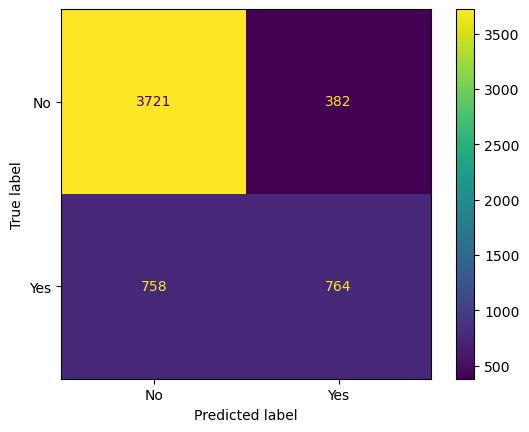

In [19]:
cm = confusion_matrix(y_train, oob_preds['Churn'])
cmd = ConfusionMatrixDisplay(cm, display_labels=['No', 'Yes'])
cmd.plot()

This is my predicted confusion matrix based on the oob data. We expect our predictions on the test data to have similar ratios to this confusion matrix. If we were not satisfied with the results of this confusion matrix, we may want to consider changing our model.

Model accuracy: 0.8252


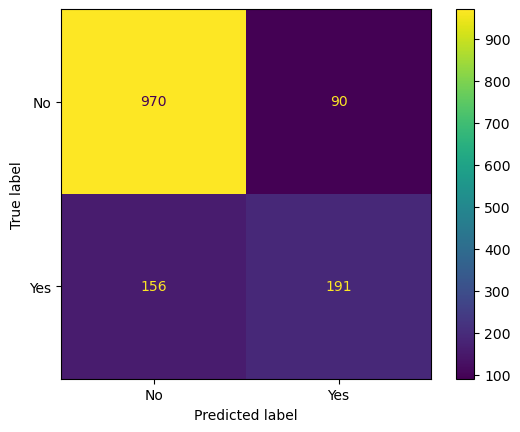

In [20]:
# make predictions
y_pred = best_rf.predict(X_test)

# calculate accuracy
print(f'Model accuracy: {best_rf.score(X_test, y_test):.4f}')

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No', 'Yes'])
cmd.plot()

### 5.4 Comparison to Decision Tree Model

The Random Forest model outperforms the earlier decision tree model in predicting churn, with an accuracy of 82.66% compared to the decision tree’s accuracy of 81.17%. However, while the Random Forest model correctly predicted that 193 out of 347 customers (55.6%) would churn, the decision tree model predicted 160 out of 347 customers (46.1%) who actually churned in the test dataset.

It’s important to note that the Random Forest model is much more accurate in predicting customers who will not churn (86%) than in predicting those who will churn (68%). In fact, the model only captures slightly more than half (56%) of the customers who actually churned in the test data. This limitation could be significant if the goal is to improve the model's ability to predict a higher percentage of customers who will churn.

## 6. Conclusion

### 6.1 Our Best Model

Our random forest model slightly outperformed our decision tree model in predicting customer churn with an accuracy of 82.66%. 

### 6.2 Limitations of the Model

In reality, it makes sense to split the accuracy into the accuracy in churn predictions vs predictions that the customer will not churn. The model's accuracy in its predictions that customers will churn is 68% while the model's accuracy in its predictions that customers will not churn is 86%. This demonstrate how our model is not as accurate at predicting the customers that will churn-- which is the prediction we care most about.

### 6.3 Potential Model Improvements

- Feature Engineering: Identifying and incorporating additional customer behavior features, such as customer service interactions, sentiment from support tickets, or browsing patterns, could improve churn predictions.
- Balancing the Dataset: If the dataset is imbalanced (i.e., more non-churning than churning customers), techniques such as oversampling churn cases or adjusting class weights can improve predictive power.
- Exploring Other Models: While decision trees and random forests performed well, trying gradient boosting models (e.g., XGBoost, LightGBM) or deep learning approaches may yield better results.
- Threshold Adjustment: Fine-tuning the probability threshold for classifying a customer as "churned" can optimize the balance between precision and recall.

### 6.4 Recommendations for Decreasing Churn

To proactively reduce customer churn, businesses can implement the following strategies:

- Personalized Customer Engagement: Use predictive insights to proactively engage at-risk customers with tailored promotions, loyalty rewards, or personalized communication.
- Flexible Subscription Plans: Providing customers with more customizable plans, pausing options, or incentives for long-term commitments may reduce churn.
- Targeted Retention Offers: Offering discounts or additional benefits to customers identified as high-risk for churn can encourage them to stay.
- Customer Feedback Loop: Implementing regular surveys and analyzing customer complaints can help address dissatisfaction before it leads to churn.